# K Means Cluster of Hotels Reviews

## Read the blobs from the knowledge store to create a dataframe

In [2]:
from azure.storage.blob import BlockBlobService

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from pandas.io.json import json_normalize
from time import time
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


# email module has some useful functions
import os, sys, email,re


STORAGEACCOUNTNAME= 'knowstoredemo'
STORAGEACCOUNTKEY= ''
LOCALFILENAME= 'temp9999.json'
CONTAINERNAME= 'hotelreviews'
cols_to_del  = ['metadata_storage_content_type', 'metadata_storage_size', 'metadata_storage_path', 'metadata_storage_content_md5', 
             'metadata_storage_last_modified', 'latitude','longitude', 'reviews_date','reviews_dateAdded', 
             'reviews_username', 'metadata_storage_name']

BLOBNAME= ''
big_df = pd.DataFrame()
#download from blob
count = 0
t0 = time()
blob_service=BlockBlobService(account_name=STORAGEACCOUNTNAME,account_key=STORAGEACCOUNTKEY)
blob_names = blob_service.list_blobs(CONTAINERNAME)
for blob in blob_names:
    blob_service.get_blob_to_path(CONTAINERNAME,blob.name,LOCALFILENAME)
    df = pd.read_json(LOCALFILENAME)
    
    
    for col in cols_to_del:
        if col in df.columns:
            del df[col]
    try:
        
        pages = json_normalize(df['pages'])
        df['LanguageCode' ] = pages['LanguageCode']
        df['SentimentScore'] = pages ['SentimentScore']
        #df.drop(['metadata_storage_content_type', 'metadata_storage_size', 'metadata_storage_path', 'metadata_storage_content_md5', 
        #         'metadata_storage_last_modified', 'latitude','longitude', 'reviews_date','reviews_dateAdded', 
        #         'reviews_username', 'metadata_storage_name'],axis=1, inplace=True, sort=False)

        #df1 = df[['address', 'categories', 'city', 'country', 'postalCode', 'province', 'name', 'reviews_rating', 'reviews_text', 'reviews_title', 'pages', 'AzureSearch_DocumentKey']]
        frames = [big_df, df]
        big_df= pd.concat(frames, sort=False)
        count = count+ 1
        if count % 100 == 0:
            
            print("done in %0.3fs." % (time() - t0))
            print(f'Processing {count} documents' )
            break
    except:
        print("Exception")
        print(AzureSearch_DocumentKey)
        print(df['pages'])
        
print(f'Processed {count} documents' )
print(big_df.columns)
print(big_df.shape)

done in 12.480s.
Processing 100 documents
Processed 100 documents
Index(['address', 'categories', 'city', 'country', 'name', 'postalCode',
       'province', 'reviews_rating', 'reviews_text', 'reviews_title',
       'AzureSearch_DocumentKey', 'pages', 'LanguageCode', 'SentimentScore'],
      dtype='object')
(100, 14)


### Flatten the dataframe and remove pages when done

In [3]:
big_df.head()



,address,categories,city,country,name,postalCode,province,reviews_rating,reviews_text,reviews_title,AzureSearch_DocumentKey,pages,LanguageCode,SentimentScore
0,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,30126,GA,4.0,"Bardzo sympatyczna obsuga, klimat hotelu. wiet...",Tip top,aHR0cHM6Ly9rbm93bGVkZ2VzdG9yZWRlbW8uYmxvYi5jb3...,"{'KeyPhrases': ['sympatyczna obsuga', 'klimat ...",pl,1.000000
0,1700 N Livermore Ave,Hotels,Livermore,US,Hawthorn Suites By Wyndham Livermore Wine Country,94551,CA,5.0,I have stayed here twice now and loved it both...,Dirty room,aHR0cHM6Ly9rbm93bGVkZ2VzdG9yZWRlbW8uYmxvYi5jb3...,"{'KeyPhrases': ['pool', 'great time', 'Staff',...",en,0.980587
0,18980 Upper Belmont Pl,"Conference & Convention Centers,Wholesale Copi...",Leesburg,US,The National Conference Center,20176,VA,3.0,Learn the tunnels. Best way to the dining room,not as bad as I thoight,aHR0cHM6Ly9rbm93bGVkZ2VzdG9yZWRlbW8uYmxvYi5jb3...,"{'KeyPhrases': ['Best way', 'dining room', 'tu...",en,0.866199
0,18980 Upper Belmont Pl,"Conference & Convention Centers,Wholesale Copi...",Leesburg,US,The National Conference Center,20176,VA,3.0,this place is creepy. weird tunnels and steril...,not as bad as I thoight,aHR0cHM6Ly9rbm93bGVkZ2VzdG9yZWRlbW8uYmxvYi5jb3...,"{'KeyPhrases': ['weird tunnels', 'sterile room...",en,0.075259
0,18980 Upper Belmont Pl,"Conference & Convention Centers,Wholesale Copi...",Leesburg,US,The National Conference Center,20176,VA,3.0,Just follow the signs. It's a lot more simple ...,not as bad as I thoight,aHR0cHM6Ly9rbm93bGVkZ2VzdG9yZWRlbW8uYmxvYi5jb3...,"{'KeyPhrases': ['lot', 'signs'], 'LanguageCode...",en,0.904357


In [14]:
big_df.values[1]

array(['aHR0cHM6Ly9rbm93bGVkZ2VzdG9yZWRlbW8uYmxvYi5jb3JlLndpbmRvd3MubmV0L2hvdGVscmV2aWV3cy1kcy83MjgyXzMuY3N2OzE0MA2',
       '1700 N Livermore Ave', 'Hotels', 'Livermore', 'US',
       'Hawthorn Suites By Wyndham Livermore Wine Country',
       {'KeyPhrases': ['pool', 'great time', 'Staff', 'upgrade', 'times'], 'LanguageCode': 'en', 'Page': 'I have stayed here twice now and loved it both times. Staff are very courteous and welcoming. The pool can use an upgrade but we still had a great time lounging next to the pool.', 'SentimentScore': 0.980587303638458},
       94551, 'CA', 5.0,
       'I have stayed here twice now and loved it both times. Staff are very courteous and welcoming. The pool can use an upgrade but we still had a great time lounging next to the pool.',
       'Dirty room'], dtype=object)

## K-Means 
  * TFIDF
  * Initialize Centroids
  * Run
    

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = big_df['reviews_text']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [38]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

,00,000,00am,00dollar,00pm,01,02,0200,0330,03am,...,½ttï,½tuste,½tï,½ve,½ven,½vï,½zï,½ï,ãªtre,ã¼berrascht
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self   

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


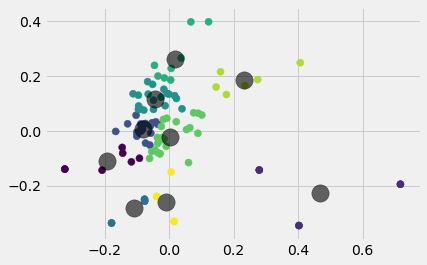

In [6]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(9, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [31]:
print(fitted)


In [41]:
len(predicted_values)

6644

In [42]:
big_df['centroid'] = predicted_values

In [43]:
big_df.to_csv(path_or_buf="centroid.csv", index=True)